# Vertebral Column Data
#### Hui Xie HW1
#### Github Username: qxie44 USCID: 7956658480


### (a) Download Data

Package imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Get the Vertebral Column Data Set

In [2]:
#I think we only need 2c
#df3C = pd.read_csv("vertebral_column_data/column_3C.dat", sep=' ', header=None)
df2C = pd.read_csv("../data/vertebral_column_data/column_2C.dat", sep=' ', header=None)
df2C.rename(columns={0: "pelvic_incidence", 1: "pelvic_tilt", 2: "lumbar_lordosis_angle", 3:"sacral_slope", 4:"pelvic_radius",5: "degree_spondylolisthesis", 6: "Class"}, inplace=True)
df2C.head()


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

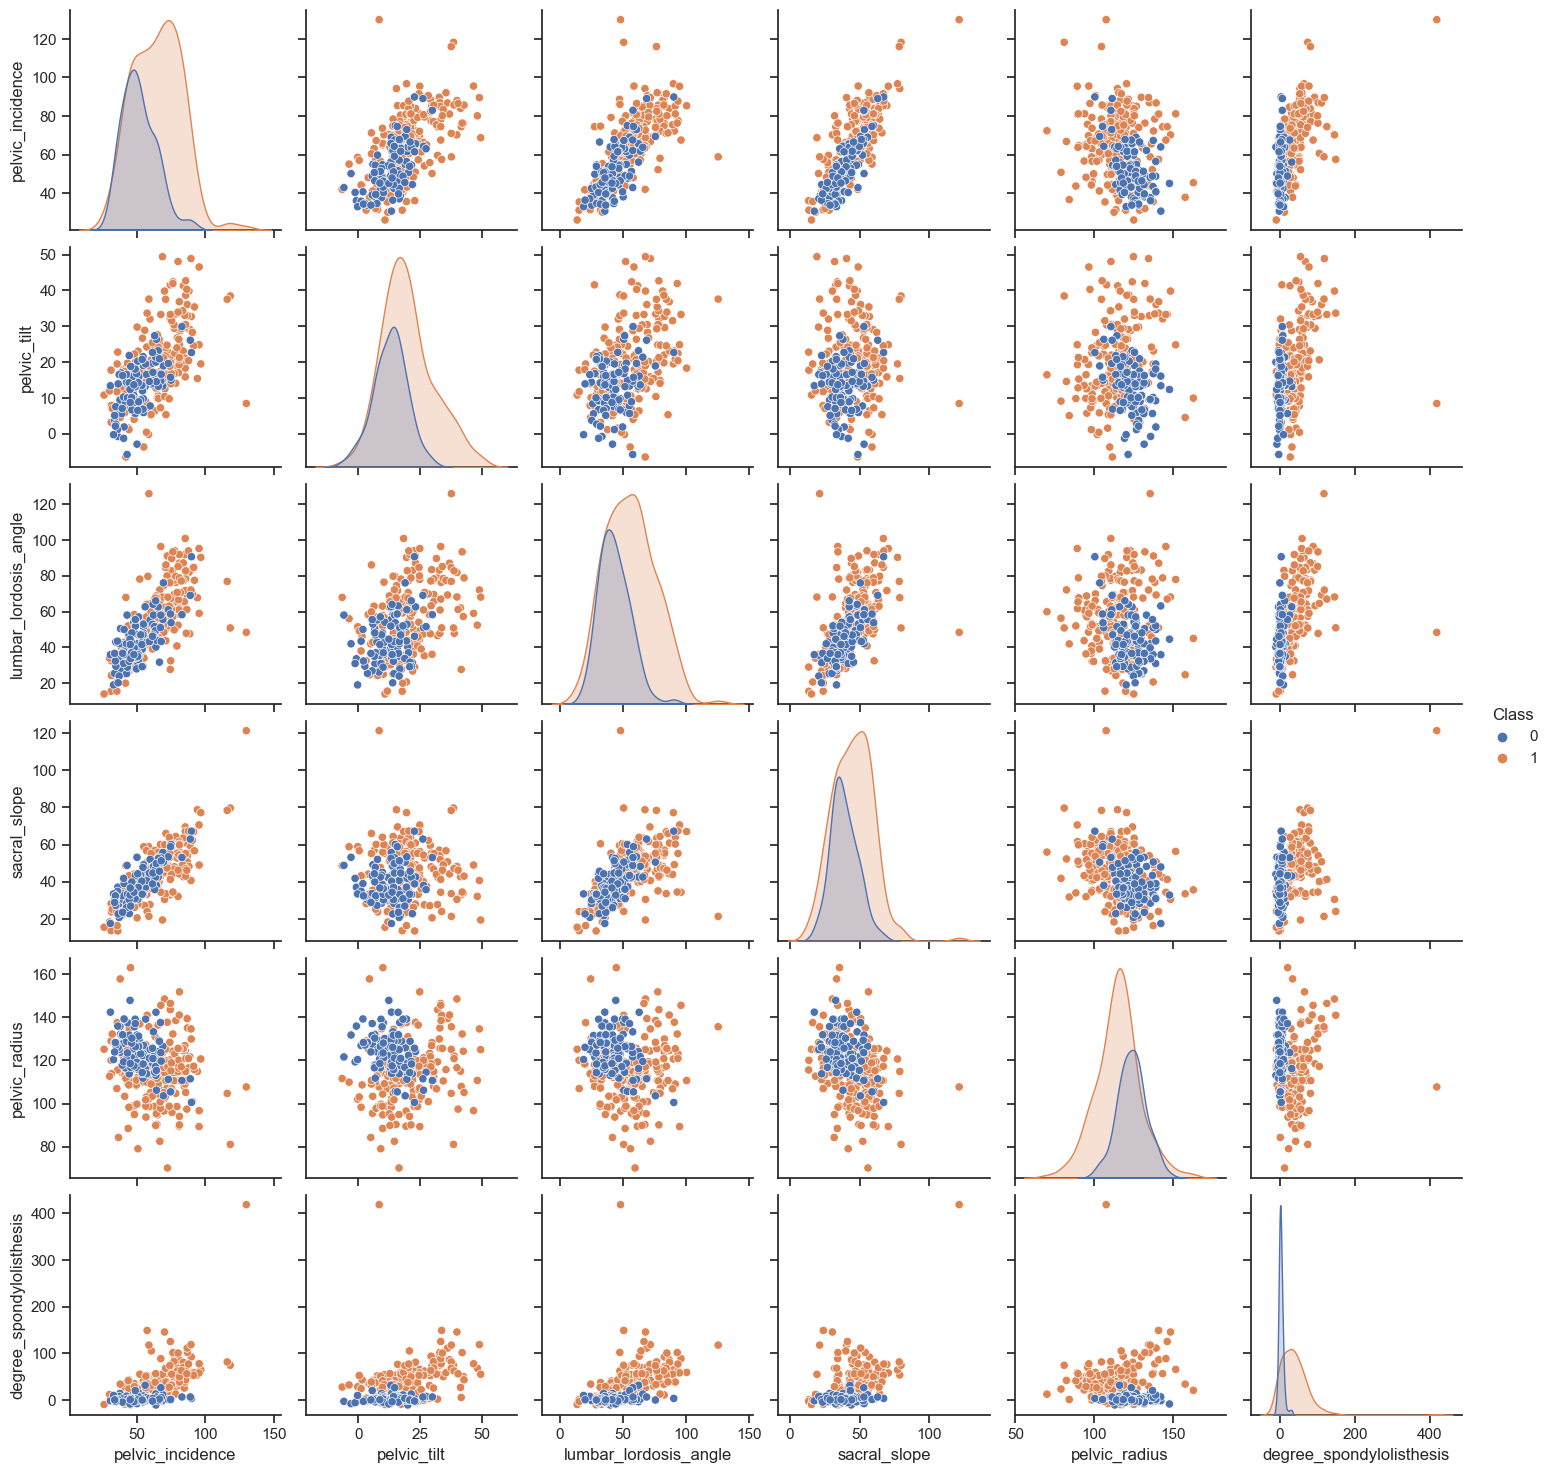

In [3]:
df2C['Class'] = df2C['Class'].replace({'NO':0, 'AB' : 1})
varName = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

#loops through all the variables and the one after to construct plot
#for i, var1 in enumerate(varName):
#    for var2 in varName[i+1:]:
#        plt.figure(figsize=(4,4))
#        plt.scatter(df2C[var1], df2C[var2], c=df2C['Class'], alpha=0.7)
#        plt.xlabel(var1)
#        plt.ylabel(var2)
#        plt.title(f'{var1} vs {var2} by Class')
#        plt.colorbar(ticks=[0, 1])
#        plt.show()

#this is more space efficient
sns.set_theme(style="ticks")
sns.pairplot(df2C, hue = "Class")

#### ii. Boxplots

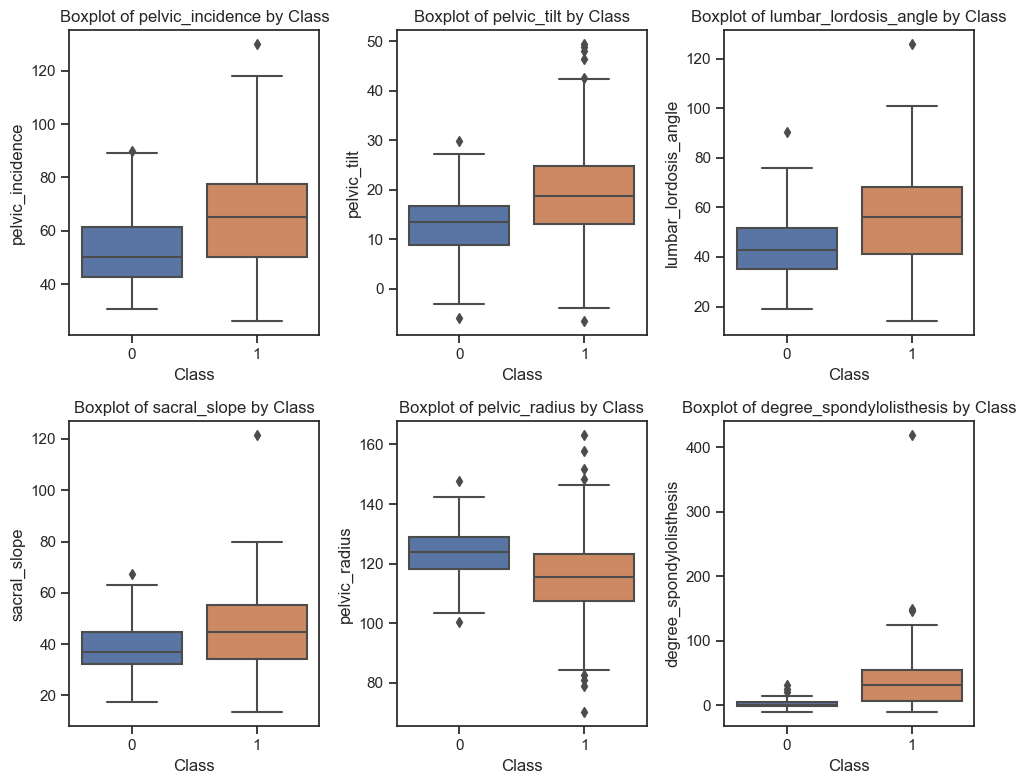

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8)) 
for i in range(len(varName)):
    sns.boxplot(data = df2C, x = "Class", y = varName[i], ax = axs[i // 3, i % 3])
    axs[i // 3, i % 3].set_title(f'Boxplot of {varName[i]} by Class')
    plt.tight_layout()  #corrects spacing


#### iii. Split Data Set

In [5]:
#filter
class0 = df2C[df2C['Class'] == 0]
class1 = df2C[df2C['Class'] == 1]
#select first values
train0 = class0.iloc[:70]
train1 = class1.iloc[:140]
#train data
train = pd.concat([train0, train1])
#test
test0 = class0.iloc[70:]
test1 = class1.iloc[140:]
#test data
test = pd.concat([test0, test1])

#me checking for the correct dimensions
train.shape
test.shape
df2C.shape



(310, 7)

### (c) Classification

#### i. Euclidean Metric

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
#referenced from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#everything but the class
X_train = train.drop(columns=['Class'])
X_test = test.drop(columns=['Class'])

#just the class
y_train = train['Class']
y_test = test['Class']


In [7]:
#chatGPT prompt: "python k-neighbor loop format"
#store train and test
trainErrorList = []
testErrorList = []
kVal = list(range(208, 0, -3))

for k in kVal:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)

    #predict train and test
    trainPred = knn.predict(X_train)
    testPred = knn.predict(X_test)

    #calculate error
    trainError = 1 - accuracy_score(y_train, trainPred)
    testError = 1 - accuracy_score(y_test, testPred)

    #add to list
    trainErrorList.append(trainError)
    testErrorList.append(testError)
    

#### ii. Test Data

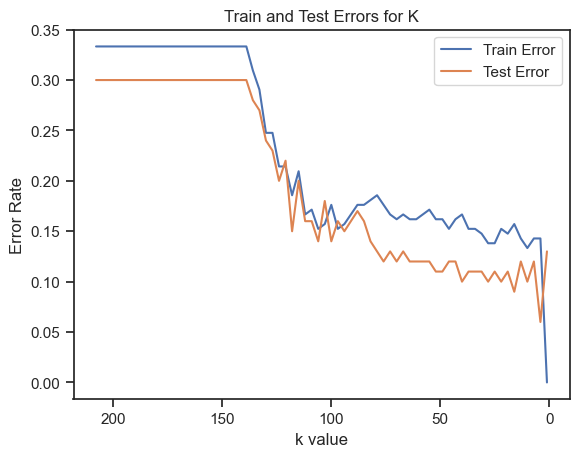

In [8]:
plt.plot(kVal, trainErrorList, label='Train Error')
plt.plot(kVal, testErrorList, label='Test Error')
plt.xlabel('k value')
plt.ylabel('Error Rate')
plt.title('Train and Test Errors for K')
plt.legend()
#invert the graph
plt.gca().invert_xaxis()
plt.show()

In [9]:
#Calculate confusion matrix, true positive rate, true negative rate, precision, and F1-score
#find optimal k
optimalK = kVal[np.argmin(testErrorList)]
print("Optimal k = " + str(optimalK))

bestKnn =  KNeighborsClassifier(n_neighbors=optimalK, metric='euclidean')
bestKnn.fit(X_train, y_train)

#bestTrainPred = bestKnn.predict(trainScaled)
bestTestPred = bestKnn.predict(X_test)

#confusion matrix
matrix = confusion_matrix(y_test, bestTestPred)
print(matrix)
tn, fp, fn, tp = matrix.ravel()
 
#true positive rate
truep = tp / (tp + fn)
print("True positive rate = " + str(truep))
#true negative rate
truen = tn / (tn + fp)
print("True negative rate = " + str(truen))
#precision 
precision = tp / (tp + fp)
print("Precision = " + str(precision))
# f1  = 2 * tp / (2 * tp + fp + fn)
f1 = 2 * tp / (2 * tp + fp + fn)
print("f1-score = " + str(f1))


Optimal k = 4
[[25  5]
 [ 1 69]]
True positive rate = 0.9857142857142858
True negative rate = 0.8333333333333334
Precision = 0.9324324324324325
f1-score = 0.9583333333333334


#### iii. Learning Curve

In [10]:
bestTestError = []
nVal = range(10, 211, 10)
kStep = 5
for n in nVal:
    #training set: first (N/3) rows of Class 0 and N−(N/3) rows of Class 1 in the training set
    subset0 = train[train['Class'] == 0].iloc[:n // 3]
    subset1 = train[train['Class'] == 1].iloc[:n - (n // 3)]
    trainSubset = pd.concat([subset0, subset1])

    xtrainSub = trainSubset.drop(columns=['Class'])
    ytrainSub = trainSubset['Class']

    testErrorList = []
    kVal = range(1, n, kStep)
    for k in kVal:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(xtrainSub, ytrainSub)
        yPred = knn.predict(X_test)
        testError = 1 - accuracy_score(y_test, yPred)
        testErrorList.append(testError)

    bestTest = min(testErrorList)
    bestTestError.append(bestTest)



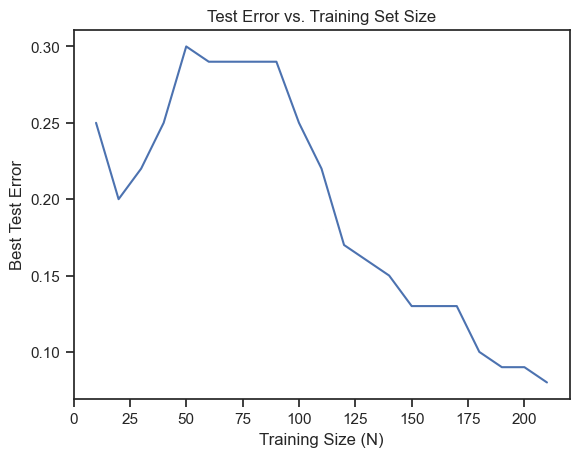

In [11]:
plt.plot(nVal, bestTestError)
plt.xlabel("Training Size (N)")
plt.ylabel("Best Test Error")
plt.title("Test Error vs. Training Set Size")
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [12]:
kVal = range(1,197,5)
bestK = {}
manhTestError = []
for k in kVal:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 1)
    knn.fit(X_train, y_train)
    yPred = knn.predict(X_test)
    #error
    testError = 1 - accuracy_score(y_test, yPred)
    manhTestError.append(testError)
    
minError = min(manhTestError)
bestKs = [k for k, error in zip(kVal, manhTestError) if error == minError]
print("Best K in Manhattan Distance: ", bestKs)

Best K in Manhattan Distance:  [6, 11, 26]


In [13]:
#plotting table
mandata = {'k': kVal, 'Test Error': manhTestError}
mandf = pd.DataFrame(mandata)
print(mandf)


      k  Test Error
0     1        0.12
1     6        0.11
2    11        0.11
3    16        0.12
4    21        0.12
5    26        0.11
6    31        0.12
7    36        0.13
8    41        0.13
9    46        0.13
10   51        0.14
11   56        0.13
12   61        0.15
13   66        0.15
14   71        0.14
15   76        0.14
16   81        0.16
17   86        0.15
18   91        0.20
19   96        0.20
20  101        0.22
21  106        0.21
22  111        0.23
23  116        0.21
24  121        0.22
25  126        0.24
26  131        0.28
27  136        0.28
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.


In [14]:
logVal = np.arange(0.1, 1.1, 0.1)
#10^ log val
logP= 10 ** logVal
#print(logVal)
kStar = bestKs[0]
logErrors = []
for p in logP:
    knn = KNeighborsClassifier(n_neighbors=kStar, metric = 'minkowski', p = p)
    knn.fit(X_train, y_train)
    yPred = knn.predict(X_test)
    testError = 1 - accuracy_score(y_test, yPred)
    logErrors.append(testError)

minErrorLog = min(logErrors)
bestLogP = [p for p, error in zip(logVal, logErrors) if error == minErrorLog]
print("Best log10(p): ", bestLogP)

Best log10(p):  [0.6000000000000001]


In [15]:
#plotting table
logdata = {'Log10(p)': logVal, 'Test Error': logErrors}
logdf = pd.DataFrame(logdata)
print(logdf)


   Log10(p)  Test Error
0       0.1        0.09
1       0.2        0.09
2       0.3        0.08
3       0.4        0.08
4       0.5        0.08
5       0.6        0.06
6       0.7        0.07
7       0.8        0.08
8       0.9        0.09
9       1.0        0.09


##### C. Chebyshev Distance With p -> infinity.

In [16]:
chebTestError = []
for k in kVal:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    yPred = knn.predict(X_test)
    testError = 1 - accuracy_score(y_test, yPred)
    chebTestError.append(testError)
minCheb = min(chebTestError)
bestChebK = [k for k, error in zip(kVal, chebTestError) if error == minCheb]
print("Best Chebyshev k: ", bestChebK)

Best Chebyshev k:  [16]


In [17]:
#table
chebdata = {'k': kVal, 'Test Error': chebTestError}
chebdf = pd.DataFrame(chebdata)
print(chebdf)

      k  Test Error
0     1        0.13
1     6        0.10
2    11        0.12
3    16        0.08
4    21        0.11
5    26        0.12
6    31        0.12
7    36        0.10
8    41        0.13
9    46        0.12
10   51        0.12
11   56        0.12
12   61        0.14
13   66        0.13
14   71        0.14
15   76        0.11
16   81        0.14
17   86        0.12
18   91        0.15
19   96        0.14
20  101        0.19
21  106        0.18
22  111        0.18
23  116        0.19
24  121        0.21
25  126        0.21
26  131        0.25
27  136        0.28
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30


#### ii. Mahalanobis Distance.

In [18]:
#inverting covariance matrix of data - pseudoinverse
#covariance transpose
matrixCov = np.cov(X_train.T)
#print(matrixCov)
#Calc inverse of matrix
inverse = np.linalg.inv(matrixCov)
mahTestError =[]

for k in kVal:
    #VI is the key for covar
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params= {'VI': inverse})
    knn.fit(X_train, y_train)
    yPred = knn.predict(X_test)
    testError = 1 - accuracy_score(y_test, yPred)
    mahTestError.append(testError)

minMah = min(mahTestError)
bestMahk = [k for k, error in zip(kVal, mahTestError) if error == minMah]
print("Best Mahalnobis K: ", bestMahk)

Best Mahalnobis K:  [1, 6]


In [19]:
#table
mahData = {'k': kVal, 'Test Error': mahTestError}
mahdf = pd.DataFrame(mahData)
print(mahdf)

      k  Test Error
0     1        0.17
1     6        0.17
2    11        0.20
3    16        0.20
4    21        0.21
5    26        0.20
6    31        0.23
7    36        0.21
8    41        0.24
9    46        0.24
10   51        0.24
11   56        0.26
12   61        0.25
13   66        0.27
14   71        0.26
15   76        0.25
16   81        0.24
17   86        0.26
18   91        0.26
19   96        0.26
20  101        0.28
21  106        0.28
22  111        0.31
23  116        0.29
24  121        0.30
25  126        0.30
26  131        0.30
27  136        0.30
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30


## Summary Table

In [20]:

summaryTable = pd.DataFrame(columns=['Distance Metric', 'Best K', 'Test Error'])

rows = [
    {'Distance Metric': 'Manhattan', 'Best K': bestKs, 'Test Error': minError},
    {'Distance Metric': 'Minkowski', 'Best K': bestKs[0], 'Test Error': minErrorLog},
    {'Distance Metric': 'Chebyshev', 'Best K': bestChebK, 'Test Error': minCheb},
    {'Distance Metric': 'Mahalanobis', 'Best K': bestMahk, 'Test Error': minMah}
]
for row in rows:
    summaryTable = pd.concat([summaryTable, pd.DataFrame([row])], ignore_index=True)

print(summaryTable)


  Distance Metric       Best K  Test Error
0       Manhattan  [6, 11, 26]        0.11
1       Minkowski            6        0.06
2       Chebyshev         [16]        0.08
3     Mahalanobis       [1, 6]        0.17


/var/folders/n4/22323b5s04q10jyc3x2l4qz80000gn/T/ipykernel_9502/2934155182.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summaryTable = pd.concat([summaryTable, pd.DataFrame([row])], ignore_index=True)


### (e) Weighted Decision

In [21]:
distance = ['euclidean', 'manhattan', 'chebyshev']
finalList = []
for m in distance:
    testErrorVal = []
    for k in kVal:
        knn = KNeighborsClassifier(n_neighbors=k, metric=m, weights='distance')
        knn.fit(X_train, y_train)
        yPred = knn.predict(X_test)
        testError = 1 - accuracy_score(y_test, yPred)
        testErrorVal.append(testError)
    minErr = min(testErrorVal)
    optK = [k for k, error in zip(kVal, testErrorVal) if error == minErr]
    finalList.append({'Distance Metric': m, 'Best K': optK, 'Test Error': minErr})

finalTable = pd.DataFrame(finalList)
print(finalTable)

  Distance Metric                Best K  Test Error
0       euclidean                   [6]        0.10
1       manhattan                  [26]        0.10
2       chebyshev  [16, 31, 36, 41, 61]        0.11


### (f) Training Error Rate

In [22]:
print("min error: ", min(trainErrorList))

min error:  0.0


The lowest training error rate I achieved in this homework was for k = 1 in the training set where error = 0.0